<a href="https://colab.research.google.com/github/ssreeramj/ml-algos-from-scratch/blob/main/knn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [60]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0)

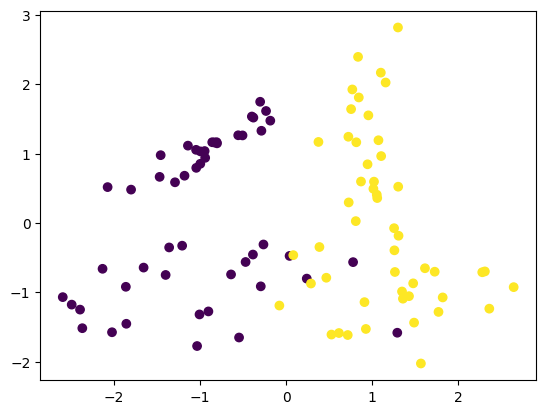

In [61]:
# prompt: plot the data and color the points according to the label

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()


In [62]:
np.unique(y).shape[0]

2

In [63]:
# calculate the distance between the queried point and all the points in the train data

# get the k points with minimum distance

# return the majority of the class

In [64]:
class KNN():
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        n_classes = np.unique(y).shape[0]
        self.X = X
        self.y = y

    def predict(self, X):
        all_preds = []
        for row in X:
            dists = []
            for d, c in zip(self.X, self.y):
                dists.append((np.linalg.norm(row - d), c))
            dists.sort(key=lambda x: x[0])

            majority_class = stats.mode([c for _, c in dists[:self.k]])
            all_preds.append(majority_class.mode)
        return all_preds


In [74]:
knn = KNN(k=3)
knn.fit(X, y)

In [75]:
%%time

y_preds = knn.predict(X)

CPU times: user 165 ms, sys: 1.11 ms, total: 166 ms
Wall time: 174 ms


In [79]:
colors = []
for a, b in zip(y, y_preds):
    if a == b:
        if a == 0:
            colors.append("purple")
        else:
            colors.append("yellow")
    else:
        colors.append("red")

In [80]:
accuracy_score(y, y_preds)

0.97

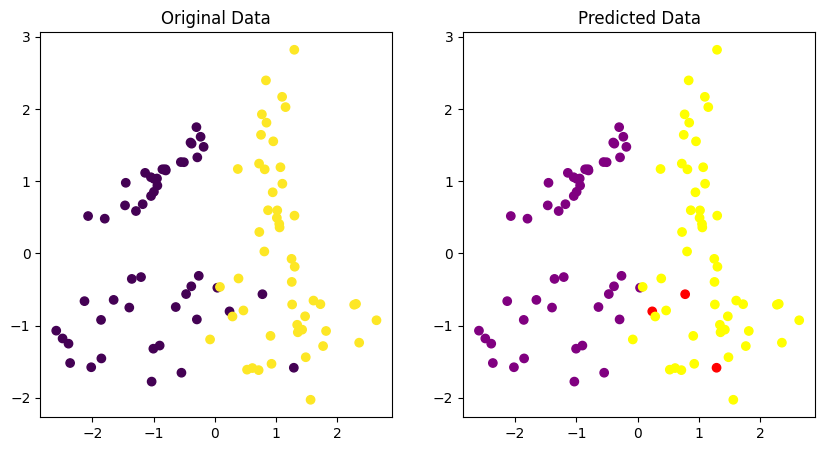

In [81]:
# prompt: use subplots and plot two plots side by side

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=y)
axs[0].set_title('Original Data')
axs[1].scatter(X[:, 0], X[:, 1], c=colors)
axs[1].set_title('Predicted Data')
plt.show()
